The Chebyshev Method
===
Let $A$ be SPD, and $C$ an SPD preconditioner. If we perform $n$ steps of the Richardson iteration with damping parameter $\tau$, the error $e^n$ follows from the initial error $e^0$ via 

$$
e^n = (I - \tau C^{-1} A)^n e^0.
$$

Now, we allow to use different damping parameters $\tau_k$ in every iteration. Then

$$
e^n = (I - \tau_n C^{-1} A) \cdots (I - \tau_2 C^{-1} A )(I - \tau_1 C^{-1} A) e^0.
$$

With the polynomial

$$
p(\lambda) = \Pi_{i=1}^n (1 - \tau_i \lambda)
$$

we can write 

$$
e^n = p(C^{-1} A) e^0
$$

We observe that $p(.)$ is a polynomial of degree $n$, such that $p(0) = 1$. Let $(\lambda_i, z^i)$ be the eigen-system of $C^{-1} A$, and expand errors with respect to the $C$-orthonormal eigen-basis:

$$
\| e^n \|_C^2 = \sum_{i=1}^N (e^n_i)^2 = \sum_{i=1}^N \big( p(\lambda_i) {e^0_i} \big)^2 \leq \max_{\lambda_i \in \sigma(C^{-1} A)} p(\lambda_i)^2 \; \| e^0 \|_C^2
$$


The goal is now to find damping parameters $\tau_1, \ldots \tau_n$ such that

$$
\max_{\lambda_i \in \sigma(C^{-1} A)} | p(\lambda_i) |
$$

is minimal. It is rarely feasible to work with the precise spectrum. But often we have bounds such that $\sigma(C^{-1} A) \subset [\gamma_1, \gamma_2]$ with $0 < \gamma_1 < \gamma_2$. Then, we can simplify the problem to optimize the polynomial such that

$$
\min_{p \in \text{Pol(n)} \atop p(0) = 1} \max_{\lambda \in [\gamma_1, \gamma_2]}
 | p(\lambda) |
$$

The solution to this min-max problem is given by Chebyshev polynomials.

Chebyshev polynomials
---

Chebyshev polynomials (of the first kind) are defined via the three-term recurrence relation 

\begin{eqnarray*}
T_0(x) & = & 1 \\
T_1(x) & = & x \\
T_{n+1}(x) & = & 2 x T_n(x) - T_{n-1}(x) \qquad n \geq 1
\end{eqnarray*}

Using induction and trigonometric addition formulas one easily 
shows that

$$
T_n(x) = \cos( n \arccos (x)) \qquad \text{for} \; x \in [-1,1]
$$

and thus 

$$
\sup_{x \in [-1,1]} T_n(x) = 1
$$

In [1]:
def Cheby(n,x):
    T,Told = x, 1+0*x     # for vectorization
    for i in range(n):
        T,Told = 2*x*T-Told, T
    return Told

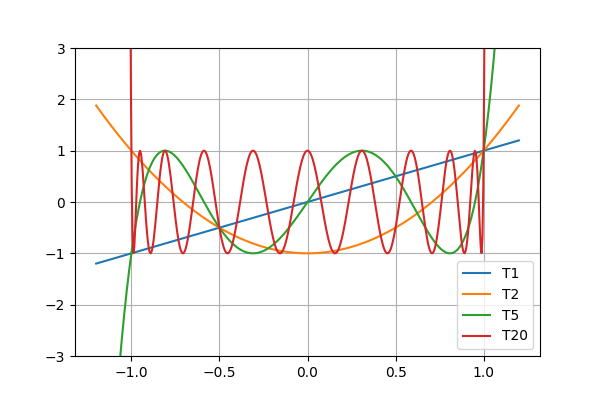

In [2]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = False
ax.set_ylim([-3, 3])
ax.grid(True)

x = np.linspace(-1.2, 1.2, 500)
for k in [1, 2, 5, 20]:
    ax.plot (x, Cheby(k,x), label='T'+str(k))
ax.legend()

We rescale 
* the argument such that $\lambda = \gamma_1$ is mapped to $-1$ and $\lambda = \gamma_2$ is mapped to $+1$,
* and scale the range such that $\widetilde T_n(0) = 1$:

$$
\widetilde T_n(\lambda) = \frac{1}{T_n \left(\tfrac{-\gamma_1-\gamma_2}{\gamma_2-\gamma_1}\right)} 
T_n \left(\tfrac{2 \lambda -\gamma_1-\gamma_2}{\gamma_2-\gamma_1}\right)
$$

In [3]:
def ScaledCheby(n,lam,gamma1, gamma2):
    x = (-gamma2-gamma1)/(gamma2-gamma1)+2/(gamma2-gamma1)*lam
    fac = 1/Cheby(n, (-gamma2-gamma1)/(gamma2-gamma1))
    return fac*Cheby(n,x)

We compare the scaled Chebyshev polynomial to the error reduction of $n$ steps Richardson iteration for the error component in the eigen-space corresponding to an eigen-value $\lambda$:
$$
(1 - \tau_{\text{opt}} \lambda)^n \qquad \text{with} \qquad \tau_\text{opt} = \frac{2}{\gamma_1 + \gamma_2}
$$

interactive(children=(IntSlider(value=5, description='n', max=50), FloatSlider(value=0.1, description='gamma1'…

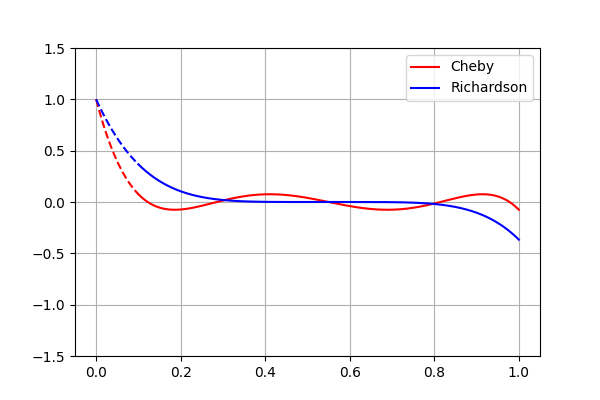

In [5]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = False

ax.set_ylim([-1.5, 1.5])
ax.grid(True)
# ax.set_title("")
 
gamma2 = 1

@widgets.interact(n=(0, 50, 1), gamma1=(0.01, 1, 0.01))
def update(n = 5, gamma1=0.1):
    s1 = np.linspace(0, gamma1, 500)
    s2 = np.linspace(gamma1, gamma2, 500)
    for l in list(ax.lines): l.remove()
    ax.plot(s1, ScaledCheby(n,s1,gamma1, gamma2), color='r', linestyle='dashed')
    ax.plot(s2, ScaledCheby(n,s2,gamma1, gamma2), color='r', label='Cheby')
    tauopt = 2/(gamma1+gamma2)
    ax.plot(s1, (1-tauopt*s1)**n, color='b', linestyle='dashed')
    ax.plot(s2, (1-tauopt*s2)**n, color='b', label='Richardson')
    
ax.legend();

The maximum of $\widetilde T$ on the interval $[\gamma_1, \gamma_2]$ is
$$
\rho_n := \frac{1}{T_n \big(\tfrac{-\gamma_1-\gamma_2}{\gamma_2-\gamma_1}\big)}
$$

A representation of Chebyshev polynomials for $x \not\in [-1,1]$ is

$$
T_n(x) = \frac{1}{2} \, \left[ \big(x+\sqrt{x^2-1}\big)^n + \big(x+\sqrt{x^2-1}\big)^{-n} \right]
$$

which is also easily proven by induction. From this we get

$$
\rho_n = \frac{2 c^n}{1 + c^{2n}} \qquad \text{with} \qquad 
c = \frac{\sqrt{\gamma_2} - \sqrt{\gamma_1}}
{ \sqrt{\gamma_2}+\sqrt{\gamma_1}}
$$

With the condition number $\kappa = \gamma_2 / \gamma_2$ there is

$$
c \approx 1 - \frac{2}{\sqrt{\kappa}} \qquad \text{and} \qquad
\rho_n \approx \big( 1 - \tfrac{2}{\sqrt{\kappa}} \big) ^n
$$

To achieve an error reduction by $\rho_n = \varepsilon$ one needs

$$
n \approx \log \varepsilon^{-1} \sqrt{\kappa}
$$

iterations.

The Chebyshev iteration
---

If we choose the optimal damping parameters $\tau_i$ for $n$ steps we obtain an error 

$$
e^n = \widetilde T_n(C^{-1} A) e^0
$$

or substituting back

$$
e^n = \frac{1}{T_n\big(\tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1}\big)} T_n\big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} I
+ \tfrac{2}{\gamma_2-\gamma_1} C^{-1} A \big) e^0
$$

defining $t_n = T_{n} \big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} \big)$ and shifting the index we have

$$
t_{n+1} e^{n+1} = T_{n+1} \big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} I
+ \tfrac{2}{\gamma_2-\gamma_1} C^{-1} A \big) e^0
$$

using the three-term recurrence we obtain

\begin{eqnarray*}
t_{n+1} e^{n+1} 
& = & 2 \big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} I
+ \tfrac{2}{\gamma_2-\gamma_1} C^{-1} A \big) T_n \big( \ldots \big) e^0 - T_{n-1} \big( \ldots \big) e^0 \\
& = & 2 \big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} I
+ \tfrac{2}{\gamma_2-\gamma_1} C^{-1} A \big) t_n e^n  - t_{n-1} e^{n-1}
\end{eqnarray*}

inserting also the recurrence for the $t_n$ we have

$$
\big( 2 \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} t_n - t_{n-1} \big) e^{n+1} 
= 2 \big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} I
+ \tfrac{2}{\gamma_2-\gamma_1} C^{-1} A \big) t_n e^n  - t_{n-1} e^{n-1}
$$

Now, we use that the error is $e^n = x^n - x^\ast$:

$$
\big( 2 \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} t_n - t_{n-1} \big) (x^{n+1} - x^\ast)
= 2 \big( \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} I
+ \tfrac{2}{\gamma_2-\gamma_1} C^{-1} A \big) t_n (x^n-x^\ast)  - t_{n-1} (x^{n-1} - x^\ast)
$$

Most $x^\ast$ cancel out, and thus

$$
t_{n+1} x^{n+1} = 2 \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} t_n x^n - t_{n-1} x^{n-1} + \tfrac{4 t_n}{\gamma_2 - \gamma_1} C^{-1} (A x^n - 
\underbrace{A x^\ast}_b)
$$

This is an algorithm to compute the iterates $x^n$. The new iterate follows from the previous two, and from the (preconditioned) residual $C^{-1} (b - A x^n)$

Instead of working with three iterates $x^k$, we can introduce the increment

$$
d^n = x^{n+1}-x^n
$$

Using $x^{n+1} = x^n + d^n$ and $x^{n-1} = x^n - d^{n-1}$ we obtain

$$
t_{n+1} (x^{n}+d^n) = 2 \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} t_n x^n - t_{n-1} (x^{n}-d^{n-1}) + \tfrac{4 t_n}{\gamma_2 - \gamma_1} C^{-1} (A x^n - b).
$$

By the three-term recurrence for $t_n$ there is $t_{n+1} = 2 \tfrac{-\gamma_2-\gamma_1}{\gamma_2-\gamma_1} t_n - t_{n-1}$.  Thus, $x^n$ cancel out and we have an update formula for $d$:

$$
t_{n+1} d^n = t_{n-1} d^{n-1} + \tfrac{4 t_n}{\gamma_2 - \gamma_1} C^{-1} (A x^n - b)
$$

Finally, we define $\rho_n = \frac{t_n}{t_{n+1}}$ which satisfies the recurrence 
$\rho_n = \big( 2 \tfrac{-\gamma_1-\gamma_2}{\gamma2-\gamma1} - \rho_{n-1}\big)^{-1}$

The final algorithm is taken from Yousef Saad: "Iterative Methods for Sparse Linear Systems" <br>
Algorithm 12.1 on page 399:
    

In [ ]:
def ChebyIteration(A, b, pre, gamma1, gamma2, tol=1e-8, maxit=200):
    x = b.CreateVector()
    r = b.CreateVector()
    w = b.CreateVector()
    d = b.CreateVector()
   
    x[:] = 0
    r.data = b - A*x
    
    theta = (gamma1+gamma2)/2
    delta = (gamma2-gamma1)/2
    sigma1 = theta/delta
    rho = 1/sigma1
    w.data = pre*r
    d.data = 1/theta * w
    
    err0 = sqrt(InnerProduct(r,w))
    for it in range(maxit):
        x += d
        r -= A * d
        w.data = pre * r
        err = sqrt(InnerProduct(w,r))
        print ("Iteration", it, "err=", err)
        d.data *= rho
        d.data += 2/delta * pre * r
        rho = 1/(2*sigma1-rho)
        d.data *= rho
        if err < tol*err0: break
        
    return x

In [ ]:
from ngsolve import *
from netgen.geom2d import unit_square
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))
fes = H1(mesh, order=1)
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx+10*u*v*dx).Assemble()
f = LinearForm(x*y*v*dx).Assemble()
gfu = GridFunction(fes)
pre = a.mat.CreateSmoother()   # Jacobi preconditioner
# pre = IdentityMatrix(a.mat.height)

In [ ]:
from ngsolve.la import EigenValues_Preconditioner
lams = list(EigenValues_Preconditioner(mat=a.mat, pre=pre))
gamma1, gamma2 = lams[0], lams[-1]
print (gamma1,gamma2)

In [ ]:
gfu.vec.data = ChebyIteration(a.mat, f.vec, pre, gamma1, gamma2, maxit=500)

Experiments: 
* modify the mesh-size
* how sensitive is the method when under/over-estimating $\gamma_1$ ?
* and $\gamma_2$ ?

In [ ]:
from ngsolve.webgui import Draw
Draw (gfu)